In [1]:
import numpy as np
import copy
import math
import time
import random
import matplotlib.pyplot as plt

In [2]:

def getInitialBoard():
    board = np.zeros(shape=(8,8))

    board[0][1] = 2
    board[0][3] = 2
    board[0][5] = 2
    board[0][7] = 2

    board[1][0] = 2
    board[1][2] = 2
    board[1][4] = 2
    board[1][6] = 2

    board[2][1] = 2
    board[2][3] = 2
    board[2][5] = 2
    board[2][7] = 2


    board[5][0] = 1
    board[5][2] = 1
    board[5][4] = 1
    board[5][6] = 1

    board[6][1] = 1
    board[6][3] = 1
    board[6][5] = 1
    board[6][7] = 1

    board[7][0] = 1
    board[7][2] = 1
    board[7][4] = 1
    board[7][6] = 1
    
    return board

In [3]:


def evaluationFun(board,player):
    val,play=gameIsSolved(board)
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    if player==1:
        if val and play==2:
            return +100 
        elif val and play==1:
            return -100
        else:
            return lengthOne-lengthTwo
    else:
        if val and play==2:
            return -100
        elif val and play==1:
            return +100
        else:
            return lengthTwo-lengthOne


    

def isAttackValid(i,j,board,player,dir):
    if player==1:
        if dir=="LEFT":
            if isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
                return True
        pass
    elif player==2:
        if dir=="LEFT":
            if isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
                return True



In [9]:

'''
kings are presented as 4 for 2
and 3 for 1
black is 1
'''
def gameIsSolved(board):
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    if lengthOne==0:
        return True,2
    elif lengthTwo==0:
        return True,1
    else:
        return False,None

'''
it can only jumps 3 times which is the maximum. Now for kings i would have to make a new method and actually implement promotions for it
'''
def getPossibleMoves(player,board):
    copyBoard = copy.deepcopy(board)
    moves = []
    
    if player==2:
        # we know that this is player 2, and we check the upper board with different kinds of bounds
        for x in range(8):
            for y in range(8):
                # without queens or kings whatever
                if board[x][y] == 2:
                    # if we have an attack availalble
                    if isAttackAvailable(x,y,board,2) !=[]:
                        listOfDirection = whereIsTheAttack(x,y,board,2)
                        if listOfDirection!=[]:
                            for direction in listOfDirection:
                                if direction=="LEFT":
                                    # FIRST JUMP LEFT
                                    newBoard = copy.deepcopy(copyBoard)
                                    newBoard[x][y]=0
                                    newBoard[x+1][y-1]=0
                                    newBoard[x+2][y-2]=2
                                    newX,newY = x+2,y-2
                                    if isAttackAvailable(newX,newY,newBoard,2) != []:
                                        newListOfDirection = whereIsTheAttack(newX,newY,newBoard,2)
                                        if newListOfDirection!=[]:
                                            for directionTwo in newListOfDirection:
                                                if directionTwo=="LEFT":
                                                    # SECOND JUMP LEFT
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX+1][newY-1]=0
                                                    newBoard[newX+2][newY-2]=2
                                                    newX,newY = newX+2,newY-2
                                                    if isAttackAvailable(newX,newY,newBoard,2) != []:
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,2)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThird in newNewListOfDirection:
                                                                if directionThird=="LEFT":
                                                                    # THIRD JUMP LEFT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY-1]=0
                                                                    newBoard[newX+2][newY-2]=2
                                                                    #newX,newY = newX+2,newY-2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    # THIRD JUMP RIGHT
                                                                    #right
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY+1]=0
                                                                    newBoard[newX+2][newY+2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                                else:
                                                    # SECOND JUMP RIGHT
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX+1][newY+1]=0
                                                    newBoard[newX+2][newY+2]=2
                                                    newX, newY = newX+2, newY+2
                                                    if isAttackAvailable(newX,newY,newBoard,2) != []:
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,2)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThird in newNewListOfDirection:
                                                                if directionThird=="LEFT":
                                                                    # THIRD JUMP LEFT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY-1]=0
                                                                    newBoard[newX+2][newY-2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    # THIRD JUMP RIGHT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY+1]=0
                                                                    newBoard[newX+2][newY+2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                    else:
                                        moves.append(copy.deepcopy(newBoard))
                                else:
                                    # FIRST JUMP RIGHT
                                    newBoard = copy.deepcopy(copyBoard)
                                    newBoard[x][y]=0
                                    newBoard[x+1][y+1]=0
                                    newBoard[x+2][y+2]=2
                                    newX,newY = x+2,y+2
                                    if isAttackAvailable(newX,newY,newBoard,2) != []:
                                        newListOfDirection = whereIsTheAttack(x+2,y+2,newBoard,2)
                                        if newListOfDirection!=[]:
                                            for directionTwo in newListOfDirection:
                                                if directionTwo=="LEFT":
                                                    # SECOND JUMP LEFT
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX+1][newY-1]=0
                                                    newBoard[newX+2][newY-2]=2
                                                    newX, newY = newX+2,newY-2
                                                    if isAttackAvailable(newX,newY,newBoard,2):
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,2)
                                                        if newNewListOfDirection !=[]:
                                                            for directionThree in newNewListOfDirection:
                                                                if directionThree == "LEFT":
                                                                    # THIRD JUMP LEFT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY-1]=0
                                                                    newBoard[newX+2][newY-2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    # THIRD JUMP RIGHT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY+1]=0
                                                                    newBoard[newX+2][newY+2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                                else:
                                                    # SECOND JUMP RIGHT
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX+1][newY+1]=0
                                                    newBoard[newX+2][newY+2]=2
                                                    newX, newY = newX+2,newY-2
                                                    if isAttackAvailable(newX,newY,newBoard,2):
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,2)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThree in newNewListOfDirection:
                                                                if directionThree == "LEFT":
                                                                    # THIRD JUMP LEFT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY-1]=0
                                                                    newBoard[newX+2][newY-2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    # THIRD JUMP RIGHT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX+1][newY+1]=0
                                                                    newBoard[newX+2][newY+2]=2
                                                                    moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                    else:
                                        moves.append(copy.deepcopy(newBoard))
                    # no attack simple move
                    else:
                        # left
                        
                        if isItInBounds(x+1,y-1) and board[x+1][y-1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y-1]=2
                            moves.append(edit)
                        # right
                        if isItInBounds(x+1,y+1) and board[x+1][y+1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y+1]=2
                            moves.append(edit)
    elif player==1:   
        for x in range(8):
            for y in range(8):
                # without queens or kings whatever   
                if board[x][y] == 1:
                    if isAttackAvailable(x,y,board,1) !=[]:
                        listOfDirection = whereIsTheAttack(x,y,board,1)
                        if listOfDirection!=[]:
                            for direction in listOfDirection:
                                if direction=="LEFT":
                                    # this is the first jump LEFT
                                    newBoard = copy.deepcopy(copyBoard)
                                    newBoard[x][y]=0
                                    newBoard[x-1][y-1]=0
                                    newBoard[x-2][y-2]=1
                                    newX, newY= x-2, y-2
                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                        newListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                        if newListOfDirection!=[]:
                                            for directionTwo in newListOfDirection:
                                                if directionTwo=="LEFT":
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX-1][newY-1]=0
                                                    newBoard[newX-2][newY-2]=1
                                                    newX, newY = newX-2, newY-2
                                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThird in newNewListOfDirection:
                                                                if directionThird=="LEFT":
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY-1]=0
                                                                    newBoard[newX-2][newY-2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY+1]=0
                                                                    newBoard[newX-2][newY+2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                    #right
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                                else:
                                                    # second JUMP right
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX-1][newY+1]=0
                                                    newBoard[newX-2][newY+2]=1
                                                    newX,newY=newX-2,newY+2
                                                    if isAttackAvailable(newX,newY,newBoard,1):
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                                        if newNewListOfDirection !=[]:
                                                            for directionThree in newNewListOfDirection:
                                                                if directionThree=="LEFT":
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY-1]=0
                                                                    newBoard[newX-2][newY-2]=1
                                                                    newX, newY = newX-2, newY-2
                                                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                                                        if newNewListOfDirection!=[]:
                                                                            for directionThird in newNewListOfDirection:
                                                                                if directionThird=="LEFT":
                                                                                    newBoard[newX][newY]=0
                                                                                    newBoard[newX-1][newY-1]=0
                                                                                    newBoard[newX-2][newY-2]=1
                                                                                    moves.append(copy.deepcopy(newBoard))
                                                                                else:
                                                                                    newBoard[newX][newY]=0
                                                                                    newBoard[newX-1][newY+1]=0
                                                                                    newBoard[newX-2][newY+2]=1
                                                                                    moves.append(copy.deepcopy(newBoard))
                                                                                    #right
                                                                    else:
                                                                        moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        newBoard[newX][newY]=0
                                                        newBoard[newX-1][newY+1]=0
                                                        newBoard[newX-2][newY+2]=1
                                                        newX,newY=newX-1,newY+2
                                                        moves.append(copy.deepcopy(newBoard))
                                    else:
                                        moves.append(newBoard)
                                else:
                                    # first jump RIGHT
                                    newBoard = copy.deepcopy(copyBoard)
                                    newBoard[x][y]=0
                                    newBoard[x-1][y+1]=0
                                    newBoard[x-2][y+2]=1
                                    newX,newY= x-2,y+2
                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                        newListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                        if newListOfDirection!=[]:
                                            for direction in newListOfDirection:
                                                if direction=="LEFT":
                                                    # second jump LEFT
                                                    newBoard[newX][newY]=0
                                                    newBoard[newX-1][newY-1]=0
                                                    newBoard[newX-2][newY-2]=1
                                                    newX, newY = newX-2, newY-2
                                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThird in newNewListOfDirection:
                                                                if directionThird=="LEFT":
                                                                    # third JUMP left
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY-1]=0
                                                                    newBoard[newX-2][newY-2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY+1]=0
                                                                    newBoard[newX-2][newY+2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                    #right
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                                else:
                                                    # second JUMP RIGHT
                                                    newBoard[newY][newY]=0
                                                    newBoard[newX-1][newY+1]=0
                                                    newBoard[newX-2][newY+2]=1
                                                    newX, newY = newX-2,newY+2
                                                    if isAttackAvailable(newX,newY,newBoard,1) != []:
                                                        newNewListOfDirection = whereIsTheAttack(newX,newY,newBoard,1)
                                                        if newNewListOfDirection!=[]:
                                                            for directionThird in newNewListOfDirection:
                                                                if directionThird=="LEFT":
                                                                    # third JUMP LEFT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY-1]=0
                                                                    newBoard[newX-2][newY-2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                                else:
                                                                    # third JUMP RIGHT
                                                                    newBoard[newX][newY]=0
                                                                    newBoard[newX-1][newY+1]=0
                                                                    newBoard[newX-2][newY+2]=1
                                                                    moves.append(copy.deepcopy(newBoard))
                                                    else:
                                                        moves.append(copy.deepcopy(newBoard))
                                    else:
                                        moves.append(newBoard)
                    # no attack simple move
                    else:
                        # left
                        if isItInBounds(x-1,y-1) and board[x-1][y-1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x-1][y-1]=1
                            moves.append(edit)
                        # right
                        if isItInBounds(x-1,y+1) and board[x-1][y+1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x-1][y+1]=1
                            moves.append(edit)
    return moves


def isAttackAvailable(i,j,board,player):
    listOfAttackAvailable = []
    if player==1:
        # direction left
        if isItInBounds(i-1, j-1) and board[i-1][j-1]==2  and isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
            listOfAttackAvailable.append((i-1,j-1))
            
            
        # direction right
        if isItInBounds(i-1, j+1) and board[i-1][j+1]==2 and isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
            listOfAttackAvailable.append((i-1,j+1))
            
        
    elif player==2:
        # direction left
        if isItInBounds(i+1,j-1) and board[i+1][j-1]==1  and isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
            listOfAttackAvailable.append((i+1,j-1))
        

        # direction right
        if isItInBounds(i+1, j+1) and board[i+1][j+1]==1 and isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
            listOfAttackAvailable.append((i+1,j+1))
    else:
        return None
    
    return listOfAttackAvailable


'''
This function only checks for the array bounds nothing else
'''
def isItInBounds(i,j):
    if i>=0 and i<=7:
        if j>=0 and j<=7:
            return True
    return False
    pass


def isThereAnAttackOnBoard(board, player):
    for i in range(8):
        for j in range(8):
            if board[i][j]  == 1: # player one
                listOfAttacks=isAttackAvailable(i,j,board,1)
                if listOfAttacks != []:
                    if player == 1:
                        return True
                
            elif board[i][j] == 2: # player two
                listOfAttacks=isAttackAvailable(i,j,board,2)
                if listOfAttacks != []:
                    if player == 2:
                        return True
    
    return []


'''
i and j is used for the current checker piece and directions sets where to look for
'''
def isItClearBounds(i,j,board, direction, player):
    if player==2:
        if direction=="LEFT":
            if isItInBounds(i+1,j-1):
                if (0 == board[i+1][j-1]):
                    return True
        elif direction=="RIGHT":
                if isItInBounds(i+1,j+1):
                    if (0 == board[i+1][j+1]):
                        return True

    if player==1:
            if direction=="LEFT":
                if isItInBounds(i-1,j-1):
                    if (0 == board[i-1][j-1]):
                        return True
            elif direction=="RIGHT":
                    if isItInBounds(i-1,j+1):
                        if (0 == board[i-1][j+1]):
                            return True
    return False

def whereIsTheAttack(i,j,board, player):
    attacks = []

    if player==2:
        if isItInBounds(i+1,j-1) and board[i+1][j-1] == 1 and isAttackValid(i,j,board,2,"LEFT"):
            attacks.append("LEFT")
        if  isItInBounds(i+1,j+1) and board[i+1][j+1]==1 and isAttackValid(i,j,board,2,"RIGHT"):
            attacks.append("RIGHT")
        return attacks
    elif player==1:
            if isItInBounds(i-1,j-1) and 2 == board[i-1][j-1] and isAttackValid(i,j,board,1,"LEFT"):
                attacks.append("LEFT")
            if isItInBounds(i-1,j+1) and 2 == board[i-1][j+1] and isAttackValid(i,j,board,1,"RIGHT"):
                attacks.append("RIGHT")
    return attacks


def move(player,board):
    bestScore = -math.inf
    moves = getPossibleMoves(player, board)
    moveloc = moves[0]
    for position in moves:
        if player==1:
            score = alphabeta(position, 3, -math.inf, math.inf, True, 1,1)
        elif player==2: 
            score = alphabeta(position, 3, -math.inf, math.inf, True, 2,2)
        if score > bestScore:
            bestScore = score
            moveLoc = position
    return moveLoc


In [11]:
def startGame():
    
    board = getInitialBoard()
    # create player objects
    player = 1
    while(True):
        print("initial player", player)
        plt.imshow(board)
        plt.title("player=%i" %player)
        plt.show()
        board = move(player,board)
        boolis, playerWon = gameIsSolved(board)
        if boolis:
            print(playerWon, "Won!")
            break
        if player==1:
            player=2
            initialPlayer=2
        elif player==2:
            player=1
            initialPlayer=1


'''
initial call:
minimax(currentPosition, 3, -∞, +∞, true)
'''
def alphabeta(board,depth,alpha,beta,maxPlayer, player, initialPlayer):
    
    smallBool,_ = gameIsSolved(board)
    if smallBool or depth==0:
        return evaluationFun(board,initialPlayer)
        
    if player==1:
        player=2
    elif player==2:
        player=1

    if maxPlayer:
        bestValue = -math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, False, player,initialPlayer)
            bestValue = max(bestValue,value)
            alpha = max(alpha, value)
            if beta <= alpha:
                break
        return bestValue
        
    else:
        smallValue = math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, True, player,initialPlayer)
            smallValue = min(smallValue,value)
            beta = min(beta, value)
            if beta <= alpha:
                break
        return smallValue

In [6]:
def printBoard(board):
    plt.imshow(board)
    plt.show()

initial player 1


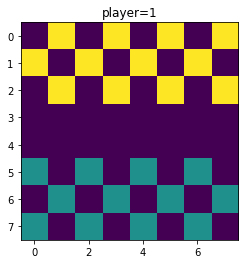

initial player 2


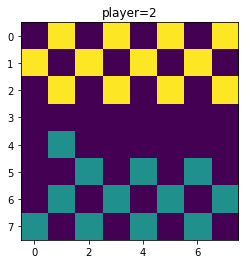

initial player 1


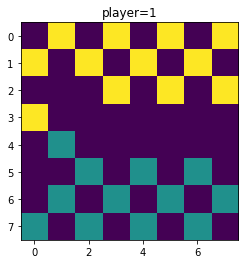

initial player 2


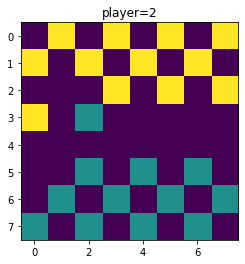

initial player 1


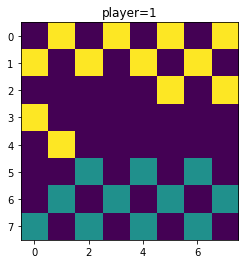

initial player 2


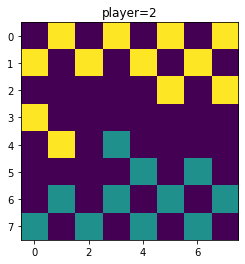

initial player 1


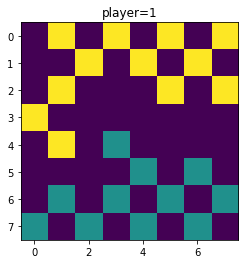

initial player 2


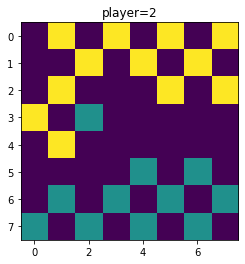

initial player 1


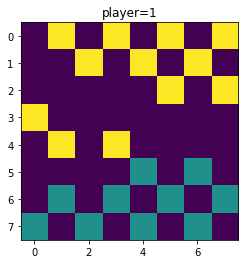

initial player 2


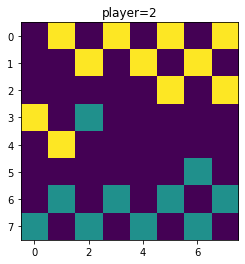

initial player 1


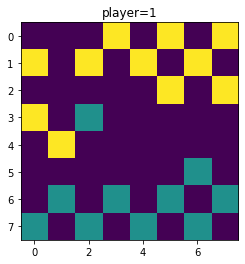

IndexError: index 8 is out of bounds for axis 0 with size 8

In [12]:

if __name__ == "__main__":
    startGame()